<a href="https://colab.research.google.com/github/Sampath-Varma/Sampath_INFO5731_Fall2024/blob/main/Byrraju_Sampath_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [1]:
# Write your code here
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load the dataset
file_path = '/content/annotated_imdb_reviews.csv'
data = pd.read_csv(file_path)

# Extract the clean_text column for analysis
texts = data['clean_text'].dropna()

# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
text_matrix = vectorizer.fit_transform(texts)

# Display the features (text representation)
feature_names = vectorizer.get_feature_names_out()
print("Features (text representation) used for topic modeling:")
print(feature_names)

# Fit the LDA model
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(text_matrix)

# Function to extract the top words for each topic
def get_top_words(model, feature_names, n_top_words):
    topics = []
    topic_descriptions = []
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics.append(f"Topic {topic_idx + 1}: {', '.join(top_words)}")
        topic_descriptions.append(f"Topic {topic_idx + 1} describes themes around: {', '.join(top_words[:5])}")
    return topics, topic_descriptions

# Extract topics and descriptions
top_topics, topic_descriptions = get_top_words(lda, feature_names, 10)

# Display the top 10 clusters
print("\nTop 10 clusters for topic modeling:")
for topic in top_topics:
    print(topic)

# Display summarized descriptions for each topic
print("\nSummarize and describe the topic for each cluster:")
for description in topic_descriptions:
    print(description)

Features (text representation) used for topic modeling:
['aback' 'abandoned' 'abandoning' ... 'zimmer' 'zimmerman' 'zimmers']

Top 10 clusters for topic modeling:
Topic 1: film, dune, best, villeneuve, denis, story, movie, screen, chalamet, films
Topic 2: dune, film, cinematic, narrative, depth, epic, performances, herberts, arrakis, experience
Topic 3: movie, dune, film, book, characters, like, best, just, denis, time
Topic 4: movie, like, just, story, good, great, film, time, really, character
Topic 5: movie, dune, just, story, really, time, good, like, acting, movies
Topic 6: film, dune, movie, just, story, book, like, people, left, time
Topic 7: movie, dune, like, just, movies, film, cinema, im, scifi, time
Topic 8: movie, story, paul, book, just, scene, way, chani, main, denis
Topic 9: paul, fremen, chani, movie, book, jessica, just, film, pauls, dune
Topic 10: movie, like, just, story, film, character, films, scene, movies, truly

Summarize and describe the topic for each cluster

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [2]:
# Write your code here
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load the dataset
file_path = '/content/annotated_imdb_reviews.csv'
data = pd.read_csv(file_path)

# Selecting features and target
X = data['clean_text']
y = data['sentiment']

# Convert text to numerical feature vectors using CountVectorizer
# Using max_df and min_df to handle term frequency thresholds and stop words
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_vectors = vectorizer.fit_transform(X.dropna())

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_vectors, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression model
lr_model = LogisticRegression(max_iter=500, random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Cross-validation (5-fold) for Logistic Regression
lr_cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='accuracy')

# Cross-validation (5-fold) for Random Forest
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Evaluation metrics on test set for Logistic Regression
lr_metrics = {
    "Accuracy": accuracy_score(y_test, lr_predictions),
    "Precision": precision_score(y_test, lr_predictions, pos_label='positive', zero_division=1),
    "Recall": recall_score(y_test, lr_predictions, pos_label='positive', zero_division=1),
    "F1 Score": f1_score(y_test, lr_predictions, pos_label='positive', zero_division=1)
}

# Evaluation metrics on test set for Random Forest
rf_metrics = {
    "Accuracy": accuracy_score(y_test, rf_predictions),
    "Precision": precision_score(y_test, rf_predictions, pos_label='positive', zero_division=1),
    "Recall": recall_score(y_test, rf_predictions, pos_label='positive', zero_division=1),
    "F1 Score": f1_score(y_test, rf_predictions, pos_label='positive', zero_division=1)
}

# Displaying classification reports
lr_classification_report = classification_report(y_test, lr_predictions, zero_division=1)
rf_classification_report = classification_report(y_test, rf_predictions, zero_division=1)

# Printing results
print("Logistic Regression Metrics:")
print(lr_metrics)
print("\nRandom Forest Metrics:")
print(rf_metrics)

print("\nLogistic Regression Classification Report:")
print(lr_classification_report)

print("\nRandom Forest Classification Report:")
print(rf_classification_report)

print("\nCross-validation Mean Accuracy:")
print(f"Logistic Regression: {lr_cv_scores.mean():.4f}")
print(f"Random Forest: {rf_cv_scores.mean():.4f}")

Logistic Regression Metrics:
{'Accuracy': 0.96, 'Precision': 0.9595959595959596, 'Recall': 1.0, 'F1 Score': 0.979381443298969}

Random Forest Metrics:
{'Accuracy': 0.95, 'Precision': 0.95, 'Recall': 1.0, 'F1 Score': 0.9743589743589743}

Logistic Regression Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.20      0.33        10
    positive       0.96      1.00      0.98       190

    accuracy                           0.96       200
   macro avg       0.98      0.60      0.66       200
weighted avg       0.96      0.96      0.95       200


Random Forest Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.00      0.00        10
    positive       0.95      1.00      0.97       190

    accuracy                           0.95       200
   macro avg       0.97      0.50      0.49       200
weighted avg       0.95      0.95      0.93       200


Cross-validation Mean Accur

# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int6

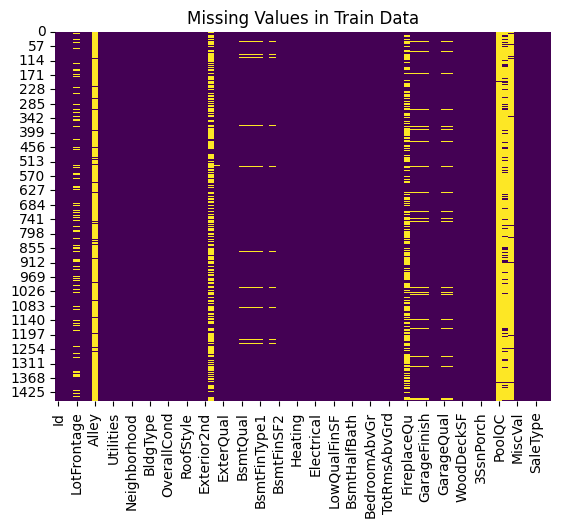

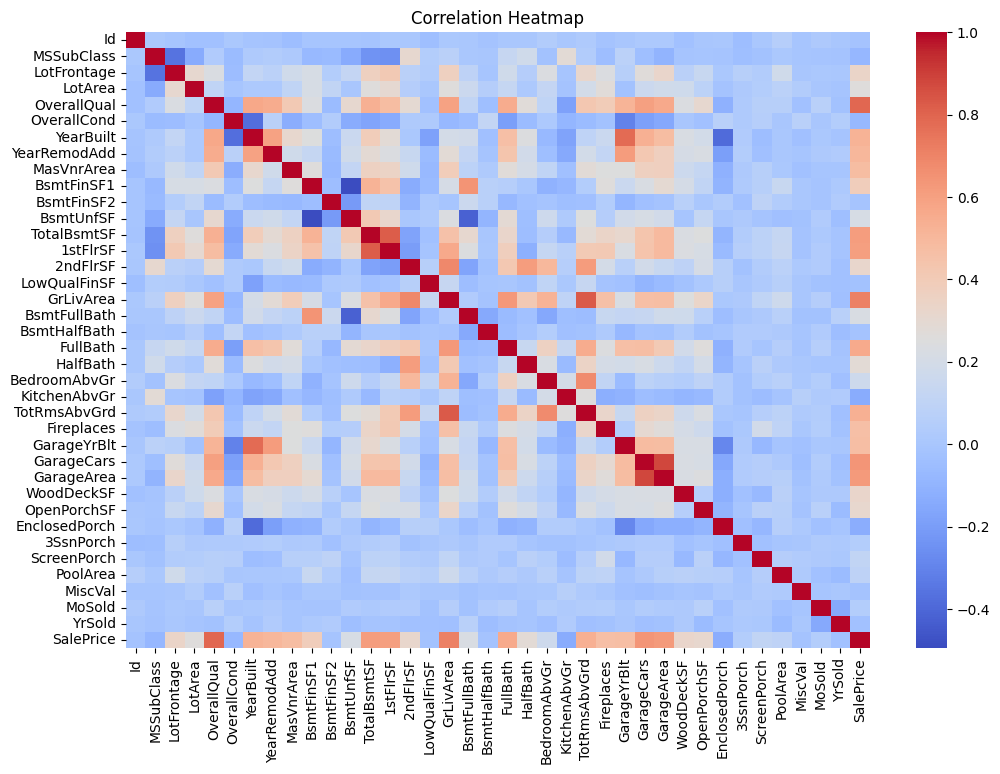

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load datasets
train_path = "/content/train.csv"
test_path = "/content/test.csv"
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# Display basic information
print("Train Data Info:")
print(train_data.info())
print("\nTest Data Info:")
print(test_data.info())

# Check for missing values
print("\nMissing Values in Train Data:")
missing_values_train = train_data.isnull().sum()
print(missing_values_train[missing_values_train > 0])

# Visualize missing values
sns.heatmap(train_data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values in Train Data")
plt.show()

# Drop columns with >30% missing values
missing_percentage = (train_data.isnull().sum() / len(train_data)) * 100
drop_cols = missing_percentage[missing_percentage > 30].index
train_data.drop(columns=drop_cols, inplace=True)
test_data.drop(columns=drop_cols, inplace=True)

# Fill remaining missing values
num_imputer = SimpleImputer(strategy="mean")
cat_imputer = SimpleImputer(strategy="most_frequent")

for col in train_data.columns:
    if train_data[col].dtype in ["int64", "float64"]:
        train_data[col] = num_imputer.fit_transform(train_data[[col]])
        if col in test_data.columns:
            test_data[col] = num_imputer.transform(test_data[[col]])
    elif train_data[col].dtype == "object":
        train_data[col] = cat_imputer.fit_transform(train_data[[col]]).ravel()
        if col in test_data.columns:
            test_data[col] = cat_imputer.transform(test_data[[col]]).ravel()

# Correlation heatmap
numeric_features = train_data.select_dtypes(include=['number']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(train_data[numeric_features].corr(), cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Split train dataset into train and validation sets
X = train_data.drop("SalePrice", axis=1)
y = train_data["SalePrice"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Selecting top correlated features with SalePrice
corr_matrix = train_data[numeric_features].corr()
top_features = corr_matrix["SalePrice"].sort_values(ascending=False).head(10).index
print("Top Features Correlated with SalePrice:")
print(top_features)

# Subset data with selected features
X_train_selected = X_train[top_features.intersection(X_train.select_dtypes(include=['number']).columns)]
X_val_selected = X_val[top_features.intersection(X_val.select_dtypes(include=['number']).columns)]

Top Features Correlated with SalePrice:
Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')


These characteristics were selected due to their high association with SalePrice, the goal variable. The real estate market has a well-established correlation between these characteristics and home values.
When assessing a property's value, physical attributes like size (e.g., GrLivArea, GarageArea, TotalBsmtSF), house quality (OverallQual), and amenities (e.g., GarageCars, FullBath) are essential.
Market value is also influenced by the house's age and size, which are revealed by YearBuilt and TotRmsAbvGrd.
Since these characteristics are practically applicable and statistically significant, they may be incorporated into the regression model to forecast SalePrice.


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_selected, y_train)

# Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42, n_estimators=100)
rf_reg.fit(X_train_selected, y_train)

RandomForestRegressor(random_state=42)

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred_lin = lin_reg.predict(X_val_selected)
y_pred_rf = rf_reg.predict(X_val_selected)

# Evaluation Metrics
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_true, y_pred)
    return {"MSE": mse, "RMSE": rmse, "R2 Score": r2}

lin_metrics = evaluate_model(y_val, y_pred_lin)
rf_metrics = evaluate_model(y_val, y_pred_rf)

print("Linear Regression Metrics:")
print(lin_metrics)
print("\nRandom Forest Regressor Metrics:")
print(rf_metrics)

Linear Regression Metrics:
{'MSE': 1565677639.1441424, 'RMSE': 39568.644646287066, 'R2 Score': 0.7958786110456297}

Random Forest Regressor Metrics:
{'MSE': 876330673.3940114, 'RMSE': 29602.88285613432, 'R2 Score': 0.8857505339769141}


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


RoBERTa (Robustly optimized BERT approach) is a pre-trained language model developed by Facebook AI, building on the architecture of BERT (Bidirectional Encoder Representations from Transformers). It was trained using a significantly larger and more diverse dataset than BERT, including sources like BooksCorpus, English Wikipedia, CC-News, OpenWebText, and Stories. RoBERTa has up to 355 million parameters in its large variant and was pre-trained with more data and for longer durations than BERT, with an emphasis on robust training strategies. Unlike BERT, RoBERTa was not fine-tuned for specific downstream tasks, making it highly versatile for a variety of natural language understanding tasks, including sentiment analysis, text classification, and question answering, without the need for task-specific fine-tuning. Its zero-shot capabilities make it ideal for tasks where labeled data for training is limited.

In [21]:
# Write your code here
import pandas as pd
from transformers import pipeline
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score

# loading & cleaning the dataset
dataset = pd.read_csv('/content/annotated_imdb_reviews.csv')
dataset = dataset.dropna(subset=['clean_text','sentiment'])
dataset = dataset.sample(n=100, random_state=42)

# converting labels to number format
mapping_label = {'positive':1, 'negative':0}
dataset['label_sentiment'] = dataset['sentiment'].map(mapping_label)

# Intiating model for sentiment analysis
name_model = "facebook/bart-large-mnli"
pipeline_sentiment = pipeline("zero-shot-classification", name_model)

labels_given = ["positive","negative"]

# Using model to predict sentiments
prediction_sentiment = []
for t in dataset['clean_text']:
  r = pipeline_sentiment(t, labels_given)
  label_predicted = r['labels'][0]
  prediction_sentiment.append(label_predicted)

# converting labels predicted to number format
labels_predicted = [mapping_label[l] if l in mapping_label else -1 for l in prediction_sentiment]

# comparing predicted sentiment to actual annotated sentiment
actual_labels = dataset['label_sentiment']

# calculating precision,accuracy,recall,f1 score
acc = accuracy_score(actual_labels, labels_predicted)
prec = precision_score(actual_labels, labels_predicted, average='weighted')
rec = recall_score(actual_labels, labels_predicted, average='weighted')
f1_score = f1_score(actual_labels, labels_predicted, average='weighted')

print(f"Accuracy Score: {acc:.3f}")
print(f"Precision Score: {prec:.3f}")
print(f"Recall Score: {rec:.3f}")
print(f"F1 Score: {f1_score:.3f}")

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Accuracy Score: 0.610
Precision Score: 0.956
Recall Score: 0.610
F1 Score: 0.715


**Advantages:**

- Zero-shot learning allows it to classify text into custom categories without the need for additional training.
- It’s pre-trained on diverse and large datasets, making it versatile for various NLP tasks.
- Performs well for tasks like text classification and sentiment analysis.

**Disadvantages:**

- Needs predefined labels, which limits flexibility in classification.
- May not perform well on texts with very subtle or complex sentiment.
- Requires a lot of computational resources to run efficiently.

**Challenges:**

- Generic outputs must be converted into specific sentiment categories.
- Long texts may need to be shortened, which can remove important context.
- Can incorrectly classify texts that contain mixed or conflicting sentiments.